# **Titanic Competition**

## **Informazioni**

**Informazioni Generali sul dataset**:

- `Survived` (`0`, `1`): Sopravvivenza (1 se la persona è sopravvissuta, 0 altrimenti);
- `Pclass` (`1`, `2`, `3`): Classe di alloggio (1°, 2° o 3° classe);
- `Sex` (`'male'`, `'female'`): Genere della persona;
- `Age`: Età (*in anni*) della persona;
- `SibSp`: Numero di fratelli oppure se sposa/marito a bordo;
- `Parch`: Numero di genitori e/o figli a bordo;
- `Ticket`: Numero identificativo del biglietto;
- `Fare`: Prezzo del biglietto;
- `Cabin`: Numero di cabina;
- `Embarked` (`C`, `Q`, `S`): Città di imbarco (Cherbourg, Queenstown, Southampton).

**Obiettivo**: Predirre se le persone elencate nel dataset di testing sono sopravvissute o meno.

## **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from titanic_utils import (sum_mean_and_count_groupby, get_eda_insights, plot_total_and_survived_based_on_label, add_name_title_column,
                           find_avg_age_title_names, family_cabin_list, add_deck_column)

sns.set_theme()

In [2]:
# importare dataset di training
train_df = pd.read_csv(filepath_or_buffer='train.csv', index_col='PassengerId')

# copia da tenere in caso di problemi
original_df = train_df.copy(deep=True)

# preview del dataset di training
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Informazioni preliminari**

In [3]:
# vedere informazioni del dataset (tipo di variabili, presenza di valori nulli, ...)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Tramite il comando `.info()` è possibile osservare che il dataset è, tutto sommato, abbastanza pulito.

Abbiamo un totale di 891 osservazioni e sono presenti **valori nulli** solamente nelle colonne `Age`, `Cabin`, ed `Embarked` (*in quest'ultima solamente due valori*).

Tramite `.describe()` è possibile osservare i principali indici statistici di ogni variabile: **media**, **deviazione standard**, **minimo**, **massimo** e **percentili**. 

In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Usando `.sum()` i valori sommati di ogni colonna:

In [5]:
train_df.sum(numeric_only=True)

Survived      342.0000
Pclass       2057.0000
Age         21205.1700
SibSp         466.0000
Parch         340.0000
Fare        28693.9493
dtype: float64

In particolare, spunti interessanti ricavabili da `.sum()` sono i seguenti:
* Su 891 passeggeri compresi in questo dataset, 342 sono sopravvissuti
* L'**incasso totale** derivante dai biglietti è stato di `28.693,9493$`

`.corr()` per vedere la **correlazione** tra le variabili

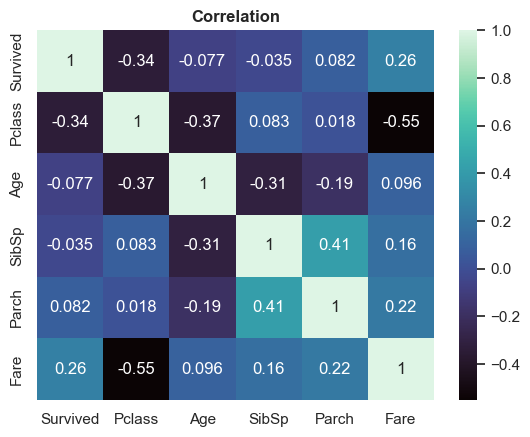

In [6]:
# correlazione
correlation = train_df.corr(numeric_only=True)

# grafico correlazione (heatmap)
heatmap = sns.heatmap(data=correlation, annot=True, cmap='mako').set_title('Correlation', weight='bold')

La correlazione mostra informazioni interessanti:
* La sopravvivenza (`'Survived'`) è particolarmente **correlata negativamente** con la variabile `'Pclass'` (*più alta è la classe di alloggio, minore è la probabilità di sopravvivenza*) e **positivamente** con la variabile `'Fare'` (*maggiore è il prezzo del biglietto, maggiore è la probabilità di sopravvivenza*)
* `'Pclass'` è **correlata negativamente** con `'Age'` (*inferiore è la classe, minore è l'età*) e con `'Fare'` (*inferiore è la classe, minore è il prezzo del biglietto*)
* `'SibSp'` è **correlata positivamente** con `'Parch'` (*se viaggi con fratelli/sorelle o moglie è probabile che viaggerai con i genitori e/o figli*) e `'Fare'` (*maggiore è il numero di parenti a bordo, più alto sarà il prezzo del biglietto*)

### **Variabile `'Pclass'`**

La variabile **'Pclass'** rappresenta la classe di alloggio del passeggero (1°, 2° o 3° classe, rispettivamente dalla migliore alla peggiore).

Questa variabile può essere fonte di diversi spunti per il nostro obiettivo.

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Pclass,,,,,,
1,216,0.242424,136,0.629630,38.233441,84.154687
2,184,0.206510,87,0.472826,29.877630,20.662183
3,491,0.551066,119,0.242363,25.140620,13.675550


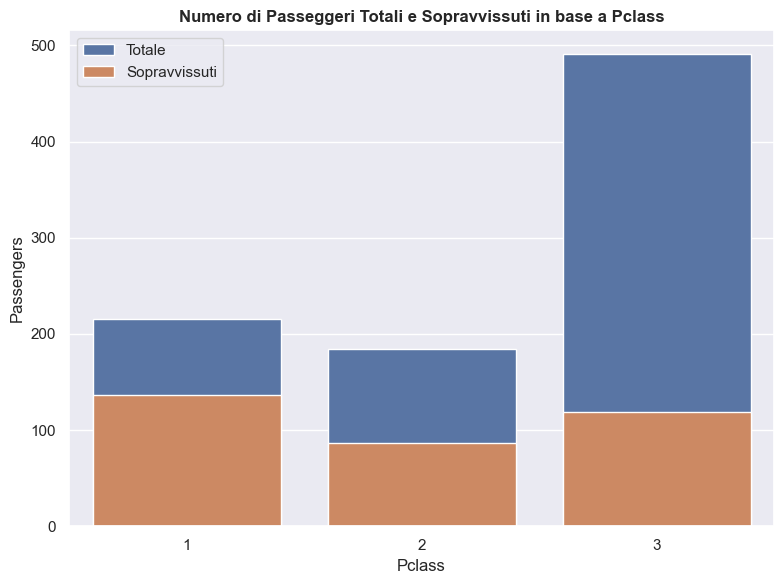

In [7]:
# groupby per somma, media e count
pclass_sum_groupby, pclass_mean_groupby, pclass_count_groupby = sum_mean_and_count_groupby(train_df=train_df, variable='Pclass')

# getting EDA insights
pclass_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Pclass')
display(pclass_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=pclass_eda_insights, variable='Pclass')

### **Variabile `'Name'`**

La variabile `'Name'`, presa a sé stante, non è importante per il nostro obiettivo.

Tuttavia, da essa è possibile estrapolare il **titolo** di ogni persona (*Mr., Mrs., Miss, Master, ...*).

Esso può portare a spunti interessanti per l'analisi

In [8]:
# aggiungo nuova colonna contenente il titolo del nominativo
train_df = add_name_title_column(titanic_df=train_df, column_with_names='Name')

# .head() per far vedere la nuova colonna
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Name_title,,,,,,
Capt,1,0.001122,0,0.000000,70.000000,71.000000
Col,2,0.002245,1,0.500000,58.000000,31.025000
Don,1,0.001122,0,0.000000,40.000000,27.720800
Dr,7,0.007856,3,0.428571,42.000000,49.168457
Jonkheer,1,0.001122,0,0.000000,38.000000,0.000000
Lady,1,0.001122,1,1.000000,48.000000,39.600000
Major,2,0.002245,1,0.500000,48.500000,28.525000
Master,40,0.044893,23,0.575000,4.574167,34.703125
Miss,182,0.204265,127,0.697802,21.773973,43.797873


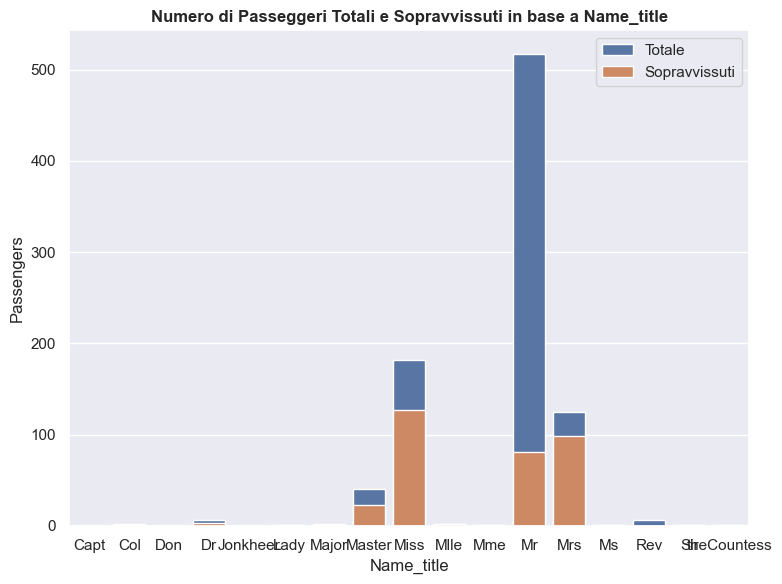

In [9]:
# groupby per somma, media e count
title_sum_groupby, title_mean_groupby, title_count_groupby = sum_mean_and_count_groupby(train_df=train_df, variable='Name_title')

# getting EDA insights
title_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Name_title')
display(title_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=title_eda_insights, variable='Name_title')

### **Variabile `'Sex'`**

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Sex,,,,,,
female,314,0.352413,233,0.742038,27.915709,44.479818
male,577,0.647587,109,0.188908,30.726645,25.523893


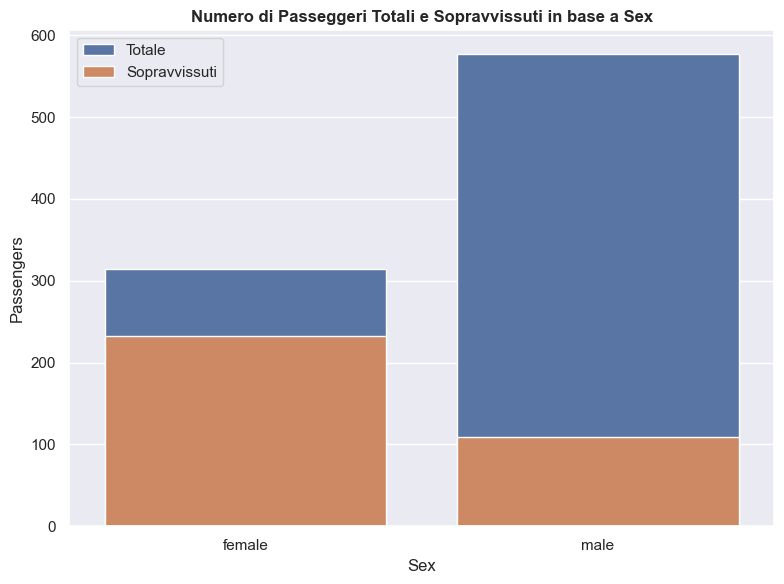

In [10]:
# groupby per somma, media e count
sex_sum_groupby, sex_mean_groupby, sex_count_groupby = sum_mean_and_count_groupby(train_df=train_df, variable='Sex')

# getting EDA insights
sex_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Sex')
display(sex_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=sex_eda_insights, variable='Sex')

### **Variabile `'Age'`**

#### **Correzione Valori Nulli**

In [11]:
# estrapolo variabile 'Age'
age = train_df['Age']

# vedere quanti nulli ci sono nella variabile
print(f'Nella variabile "Age" ci sono {age.isnull().sum()} nulli')

Nella variabile "Age" ci sono 177 nulli


Come visto dal metodo `.info()` all'inizio, la variabile `'Age'` presenta valori nulli da sistemare.

Si può procedere in due modi: cancellarli (`.drop()`) oppure scegliere un metodo per riempirli.

In questo caso, decidiamo una strategia per riempirli.

L'opzione più facile e immediata sarebbe quella di riempirli utilizzando la media della variabile (*la quale corrisponde a 30 anni*). Tuttavia, estrapolando il titolo dal nome di ogni passeggero, abbiamo a disposizione un metodo migliore: riempire i valori nulli in base all'età media del titolo nominativo.

Ad esempio, `'Master'` viene utilizzato per i ragazzini/bambini maschi, dunque riempire tali nulli con l'età media totale produrrebbe un risultato irrealistico. 


In [12]:
# trovo età media di ogni titolo nominativo
name_title_avg_age = find_avg_age_title_names(titanic_df=train_df)

print(name_title_avg_age)

Name_title
Capt           70.000000
Col            58.000000
Don            40.000000
Dr             42.000000
Jonkheer       38.000000
Lady           48.000000
Major          48.500000
Master          4.574167
Miss           21.773973
Mlle           24.000000
Mme            24.000000
Mr             32.368090
Mrs            35.898148
Ms             28.000000
Rev            43.166667
Sir            49.000000
theCountess    33.000000
Name: Age, dtype: float64


In [13]:
# ciclo for che, per ogni titolo all'interno del dataset, sostituisce i valori di età nulli in base al titolo nominativo del passeggero
for title in list(name_title_avg_age.index):
    train_df.loc[(train_df['Name_title'] == title) & (train_df['Age'].isnull()), 'Age'] = name_title_avg_age[title]


# converto age da float a int
train_df['Age'] = train_df['Age'].astype(int)

# vedere quanti nulli ci sono nella variabile
print(f'Nella variabile "Age" ci sono {age.isnull().sum()} nulli')

Nella variabile "Age" ci sono 0 nulli


Ora la variabile `'Age'` non presenta più nulli, i quali sono stati sostituiti con dei valori il più realistici possibile.

#### **EDA**

Siccome `'Age'` è una variabile continua, nei modelli di machine learning verrà utilizzata così com'è.

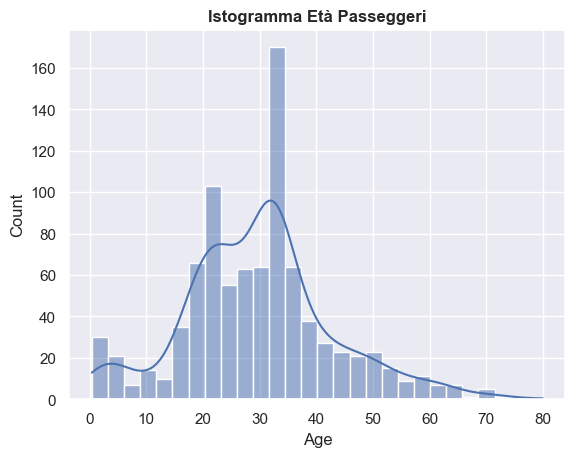

In [14]:
# istogramma variabile 'Age'
sns.histplot(age, kde=True).set_title('Istogramma Età Passeggeri', weight='bold')
plt.show()

Per fare una EDA come per le variabili precedenti (*DF con insights e grafico a barre*), è necessario creare dei range di età (*portiamo la variabile da continua a categorica*): in particolare, dato che l'età dei passeggeri va da 0 a 80, si faranno 8 range di età (*questo step è superfluo*):
* [0-10, 10-20, 20-30, 30-40, 40-50, 50-60, 60-70, 70-80]

In [15]:
# creo una lista che va da 0 ad 80 in step di 10 -> [0, 10, 20, ... , 80]
array_list = [x * 10 for x in range(9)]

# inizializzo lista in cui salvare gli 8 range
ages_ranges = []

# ciclo for su ogni elemento della lista di numeri (tranne l'ultimo)
for i in range(len(array_list) - 1):
    # identifico range [i, i+1]
    start = array_list[i]
    stop = array_list[i + 1]
    # aggiungo il range nella lista vuota
    ages_ranges.append([start, stop])


print(ages_ranges)

[[0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80]]


In [16]:
# ciclo for su ogni range all'interno della lista di range
for x in range(len(ages_ranges)):
    # identifico range in indice x
    age_range = ages_ranges[x]
    # con .loc[] identifico, per ogni riga, se l'età rientra nel range in indice x
    # se rientra nel range, inserisco in una nuova colonna 'Age_group' l'indice del range
    train_df.loc[(train_df['Age'].between(left=age_range[0], right=age_range[1])), 'Age_group'] = x


# casting variabile da float a int
train_df['Age_group'] = train_df['Age_group'].astype(int)

display(train_df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Age_group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,3
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,3
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Mr,3


,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Age_group,,,,,,
0,66,0.074074,40,0.606061,4.000000,30.625188
1,102,0.114478,41,0.401961,16.774510,32.535132
2,256,0.287318,99,0.386719,24.027344,26.317007
3,303,0.340067,101,0.333333,33.211221,32.225011
4,90,0.101010,34,0.377778,44.022222,38.020049
5,48,0.053872,20,0.416667,53.437500,47.933333
6,19,0.021324,6,0.315789,62.421053,48.367542
7,7,0.007856,1,0.142857,72.285714,30.169057


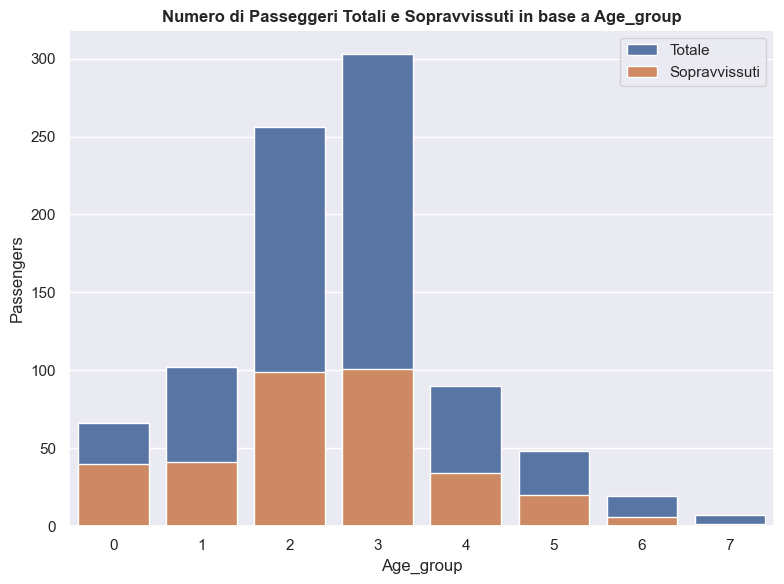

In [17]:
# groupby per somma, media e count
age_group_sum_groupby, age_group_mean_groupby, age_group_count_groupby = sum_mean_and_count_groupby(train_df=train_df, variable='Age_group')

# getting EDA insights
age_group_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Age_group')
display(age_group_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=age_group_eda_insights, variable='Age_group')

### **`SibSp` `Parch`**

Le variabili 'SibSp' e 'Parch' sono esplicative di per sé, tuttavia possono essere usate per un semplice **feature engineering**: sommandole tra loro è possibile individuare il nucleo familiare di ogni passeggero.

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Family_size,,,,,,
0,537,0.602694,163,0.303538,31.743017,21.242689
1,161,0.180696,89,0.552795,31.397516,49.894129
2,102,0.114478,59,0.578431,25.715686,39.692482
3,29,0.032548,21,0.724138,18.758621,54.864510
4,15,0.016835,3,0.200000,19.733333,58.094453
5,22,0.024691,3,0.136364,18.409091,73.722727
6,12,0.013468,4,0.333333,15.166667,29.366667
7,6,0.006734,0,0.000000,15.666667,46.900000
10,7,0.007856,0,0.000000,23.285714,69.550000


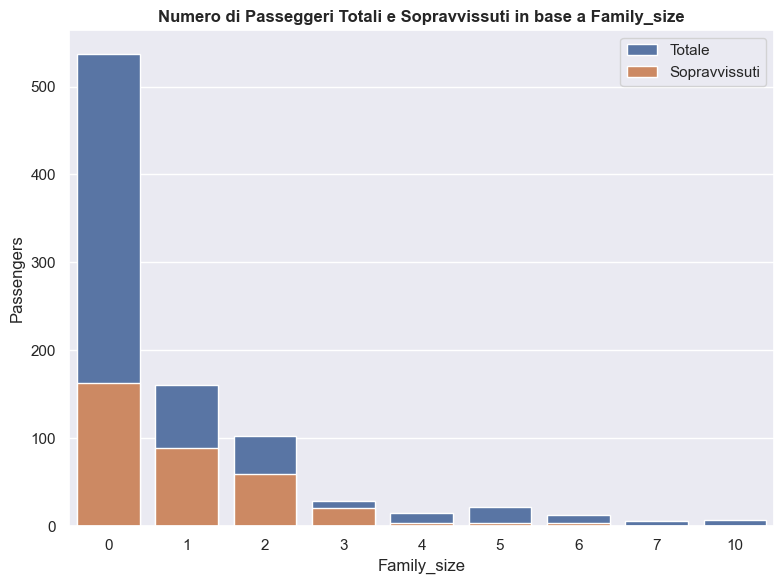

In [18]:
# creo nuova colonna 'Family_size' (numero di siblings + numero di genitori/bambini a bordo)
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']

# groupby per somma, media e count
familysize_sum_groupby, familysize_mean_groupby, familysize_count_groupby = sum_mean_and_count_groupby(train_df=train_df, variable='Family_size')

# getting EDA insights
familysize_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Family_size')
display(familysize_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=familysize_eda_insights, variable='Family_size')

### **`Ticket`**

Con la variabile `'Ticket'` non è possibile ricavare alcuno spunto di EDA, il numero identificativo di ogni biglietto è diverso per ogni nucleo familiare.

### **`Fare`**

`'Fare'` (*prezzo del biglietto*), così come `'Age'`, è una variabile continua e verrà usata così com'è.

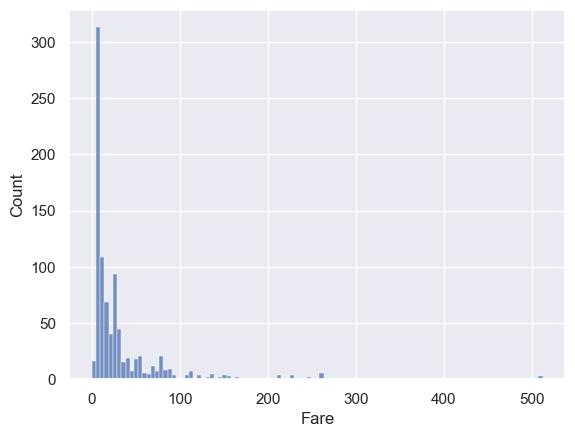

In [19]:
sns.histplot(train_df['Fare'])
plt.show()

### **`Cabin`**

`'Cabin'` è la variabile che presenta più nulli del dataset (687 su 891 osservazioni).

Non c'è molto che possiamo fare per riempire questi nulli: l'unica cosa che possiamo fare è inserire tre valori fittizi per indicare che il numero di cabina è ignoto (*tre per distinguire tra le tre classi*).

Tuttavia alcuni valori nulli non sono realmente ignoti.
Questo accade in particolari per i nuclei familiari (*non per chi viaggia da solo*): le cabine in cui alloggerà la famiglia vengono assegnate solo a colui o colei che ha pagato il biglietto, mentre agli altri familiari risulta un valore nullo.

Il numero di biglietto è tuttavia lo stesso per ogni nucleo familiare, dunque tramite esso possiamo correggere questi finti valori ignoti.

In [20]:
# find tickets with value counts > 1 (excluding passengers traveling alone)
# for each ticket create a dictionary containing all the cabins related to it
family_tickets_dict = family_cabin_list(titanic_df=train_df, ticket_column='Ticket')

print(family_tickets_dict)

# replacing null values related to a certain ticket
for ticket in family_tickets_dict:
    train_df.loc[(train_df['Ticket'] == ticket) & (train_df['Cabin'].isnull()), 'Cabin'] = family_tickets_dict[ticket][0]
    

{'PC 17757': ['C62 C64', 'C45'], '17421': ['C70', 'C68', 'C68'], '113760': ['B96 B98', 'B96 B98', 'B96 B98', 'B96 B98'], '113781': ['C22 C26', 'C22 C26', 'C22 C26'], '19950': ['C23 C25 C27', 'C23 C25 C27', 'C23 C25 C27', 'C23 C25 C27'], 'PC 17572': ['D33', 'D33', 'D49'], '24160': ['B5', 'B5', 'B3'], '35273': ['D36', 'D36', 'D48'], '230080': ['F2', 'F2', 'F2'], 'PC 17760': ['C99', 'C32'], 'PC 17582': ['C125', 'C91', 'C125'], '110152': ['B77', 'B79', 'B77'], '13502': ['D7', 'D9', 'D11'], '110413': ['E67', 'E67', 'E68'], 'PC 17755': ['B51 B53 B55', 'B101'], 'PC 17558': ['B58 B60', 'B58 B60'], '17474': ['B20', 'B20'], 'PC 17758': ['C65', 'C65'], 'PP 9549': ['G6', 'G6'], 'S.O./P.P. 3': ['E77'], 'PC 17485': ['E36', 'A20'], '2668': ['F E69'], 'WE/P 5735': ['B22', 'B22'], '35281': ['D26', 'D26'], '110465': ['C110', 'A14'], 'PC 17477': ['B35', 'B35'], '113806': ['E8', 'E8'], '230136': ['F4', 'F4'], '111361': ['B18', 'B18'], '113505': ['E33', 'E33'], '113803': ['C123', 'C123'], '16966': ['E34', 

In [21]:
# checking null values after first fix
print(train_df['Cabin'].isnull().sum())

676


Ci sono ancora numerosi nulli da sistemare.

Quelli che rimangono ora, tuttavia, non sono legati a nessun altro ticket per cui non vi è modo di poter risalire a quella che potrebbe essere la cabina reale.

Per differenziare tra le tre classi, useremo tre valori fittizi: 'X', 'Y', 'Z'

In [22]:
# replacing null values of 3rd class passengers with 'Z'
train_df.loc[(train_df['Pclass'] == 3) & (train_df['Cabin'].isnull()), 'Cabin'] = 'Z'

# replacing null values of 2nd class passengers with 'Y'
train_df.loc[(train_df['Pclass'] == 2) & (train_df['Cabin'].isnull()), 'Cabin'] = 'Y'

# replacing null values of 1st class passengers with 'X'
train_df.loc[(train_df['Pclass'] == 1) & (train_df['Cabin'].isnull()), 'Cabin'] = 'X'

In [23]:
# checking null values after second fix
print(train_df['Cabin'].isnull().sum())

0


Ora la colonna `'Cabin'` è sistemata.

Da ogni cabina è possibile risalire al **ponte di alloggio** (*deck*) di ogni passeggero, indicato nella lettera iniziale di ogni cabina.

In [24]:
# add cabin deck column
train_df = add_deck_column(titanic_df=train_df, cabin_column='Cabin')

display(train_df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Age_group,Family_size,Cabin_deck
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Z,S,Mr,2,1,Z
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,3,1,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,2,0,Z
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,3,1,C
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Z,S,Mr,3,0,Z


,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Cabin_deck,,,,,,
A,15,0.016835,7,0.466667,42.266667,39.623887
B,48,0.053872,36,0.750000,34.895833,121.814585
C,67,0.075196,41,0.611940,34.940299,106.152051
D,33,0.037037,25,0.757576,38.696970,57.244576
E,33,0.037037,24,0.727273,36.818182,44.950127
F,14,0.015713,9,0.642857,21.928571,18.958329
G,4,0.004489,2,0.500000,14.750000,13.581250
T,1,0.001122,0,0.000000,45.000000,35.500000
X,31,0.034792,12,0.387097,40.419355,43.818006


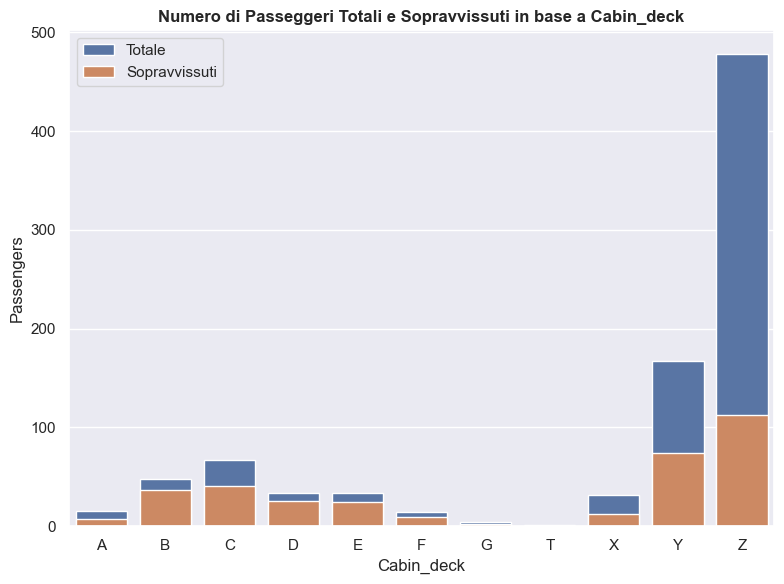

In [25]:
# Cabin deck EDA analysis
deck_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Cabin_deck')
display(deck_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=deck_eda_insights, variable='Cabin_deck')

### `Embarked`

Nella colonna `'Embarked'` sono presenti solamente 2 valori nulli.

Per sostituirli, guardiamo attraverso `.value_counts()` l'etichetta prevalente e riempiamo i nulli in base a quella.

In [26]:
# embarked value counts
embarked_value_counts = train_df['Embarked'].value_counts()

print(embarked_value_counts)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


La maggior parte dei valori appartiene a `'S'` (*Southampton*), inseriamo questo valore nei nulli.

In [28]:
# fill NaN 
train_df['Embarked'] = train_df['Embarked'].fillna('S')

display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Name_title   891 non-null    object 
 12  Age_group    891 non-null    int32  
 13  Family_size  891 non-null    int64  
 14  Cabin_deck   891 non-null    object 
dtypes: float64(1), int32(2), int64(5), object(7)
memory usage: 104.4+ KB


None

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Embarked,,,,,,
C,168,0.188552,93,0.553571,30.744048,59.954144
Q,77,0.086420,30,0.389610,27.311688,13.276030
S,646,0.725028,219,0.339009,29.628483,27.243651


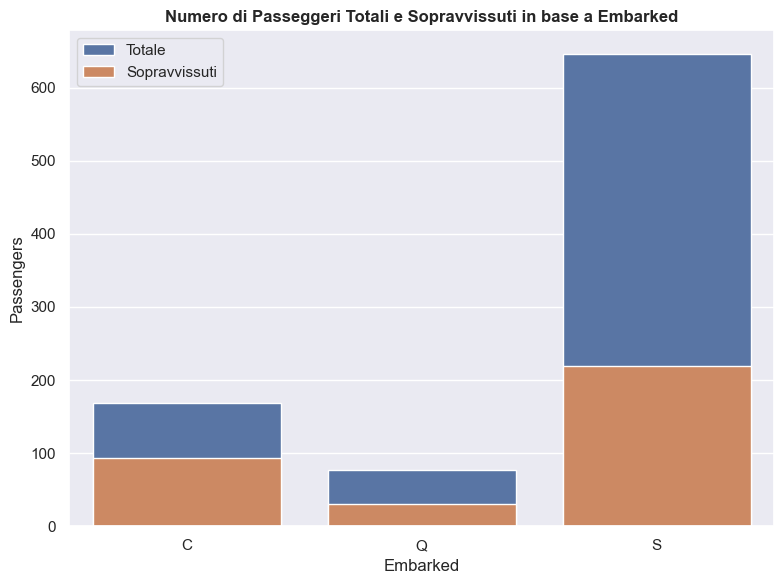

In [29]:
# Embarked EDA insights
embarked_eda_insights = get_eda_insights(titanic_train_dataset=train_df, variable='Embarked')
display(embarked_eda_insights)

# plot total amount of passengers against survived ones
plot_total_and_survived_based_on_label(variable_insights_df=embarked_eda_insights, variable='Embarked')

## **Exporting**

Ora che l'EDA e il feature engineering sono stati svolti e i valori nulli sono stati corretti, possiamo esportare il file CSV pre-processato per utilizzarlo nella parte di machine learning.

In [30]:
train_df.to_csv(path_or_buf='titanic_data/processed_data/train_processed.csv', index=False)